In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
src_dir_path = '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/TSB-AD-M'

In [26]:
specific = True
if specific:
    keywords_to_include = [
        #'074_SMD', '051_GHL', '055_GHL', '034_GHL', '036_GHL', '042_GHL', '046_GHL'
        #'065_SMD', '073_SMD', '078_SMD', '115_PSM', '130_OPPORTUNITY', '144_SMAP', '173_GECCO', '042_GHL'
        #'002', '003', '005', '006_MSL', '007_MSL', '008', '009', '012', '014', '017', # MSL
        '133_OPPORTUNITY' ,'146_SMAP', '157_SMAP'
    ]
    # attach '_' to each element in keywords_to_include
    keywords_to_include = [keyword + '_' for keyword in keywords_to_include]

    file_names = os.listdir(src_dir_path)
    file_names = [file_name for file_name in file_names if any(keyword in file_name for keyword in keywords_to_include)]
    file_names.sort()
    file_paths = [os.path.join(src_dir_path, file_name) for file_name in file_names]
else:
    src_file_path = '/home/hwkang/dev-TSB-AD/TSB-AD/Datasets/File_List/TSB-AD-M-Eva.csv'
    df = pd.read_csv(src_file_path)
    file_names = df['file_name'].tolist()
    file_paths = [os.path.join(src_dir_path, file_name) for file_name in file_names]

In [27]:
dfs = []
anomaly_indices = []
for file_path in file_paths:
    anomalies = []
    df = pd.read_csv(file_path)
    #print(f"Shape: {df.shape}")
    dfs.append(df)
    # On last column of df, anomalies are marked with 1, put the index of anomalies in a list
    for i in range(len(df)):
        if df.iloc[i, -1] == 1:
            anomalies.append(i)
    #print(f"Anomalies: {len(anomalies)}")
    anomaly_indices.append(anomalies)

(6980, 249)


/tmp/ipykernel_4068107/3340089010.py:34: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle


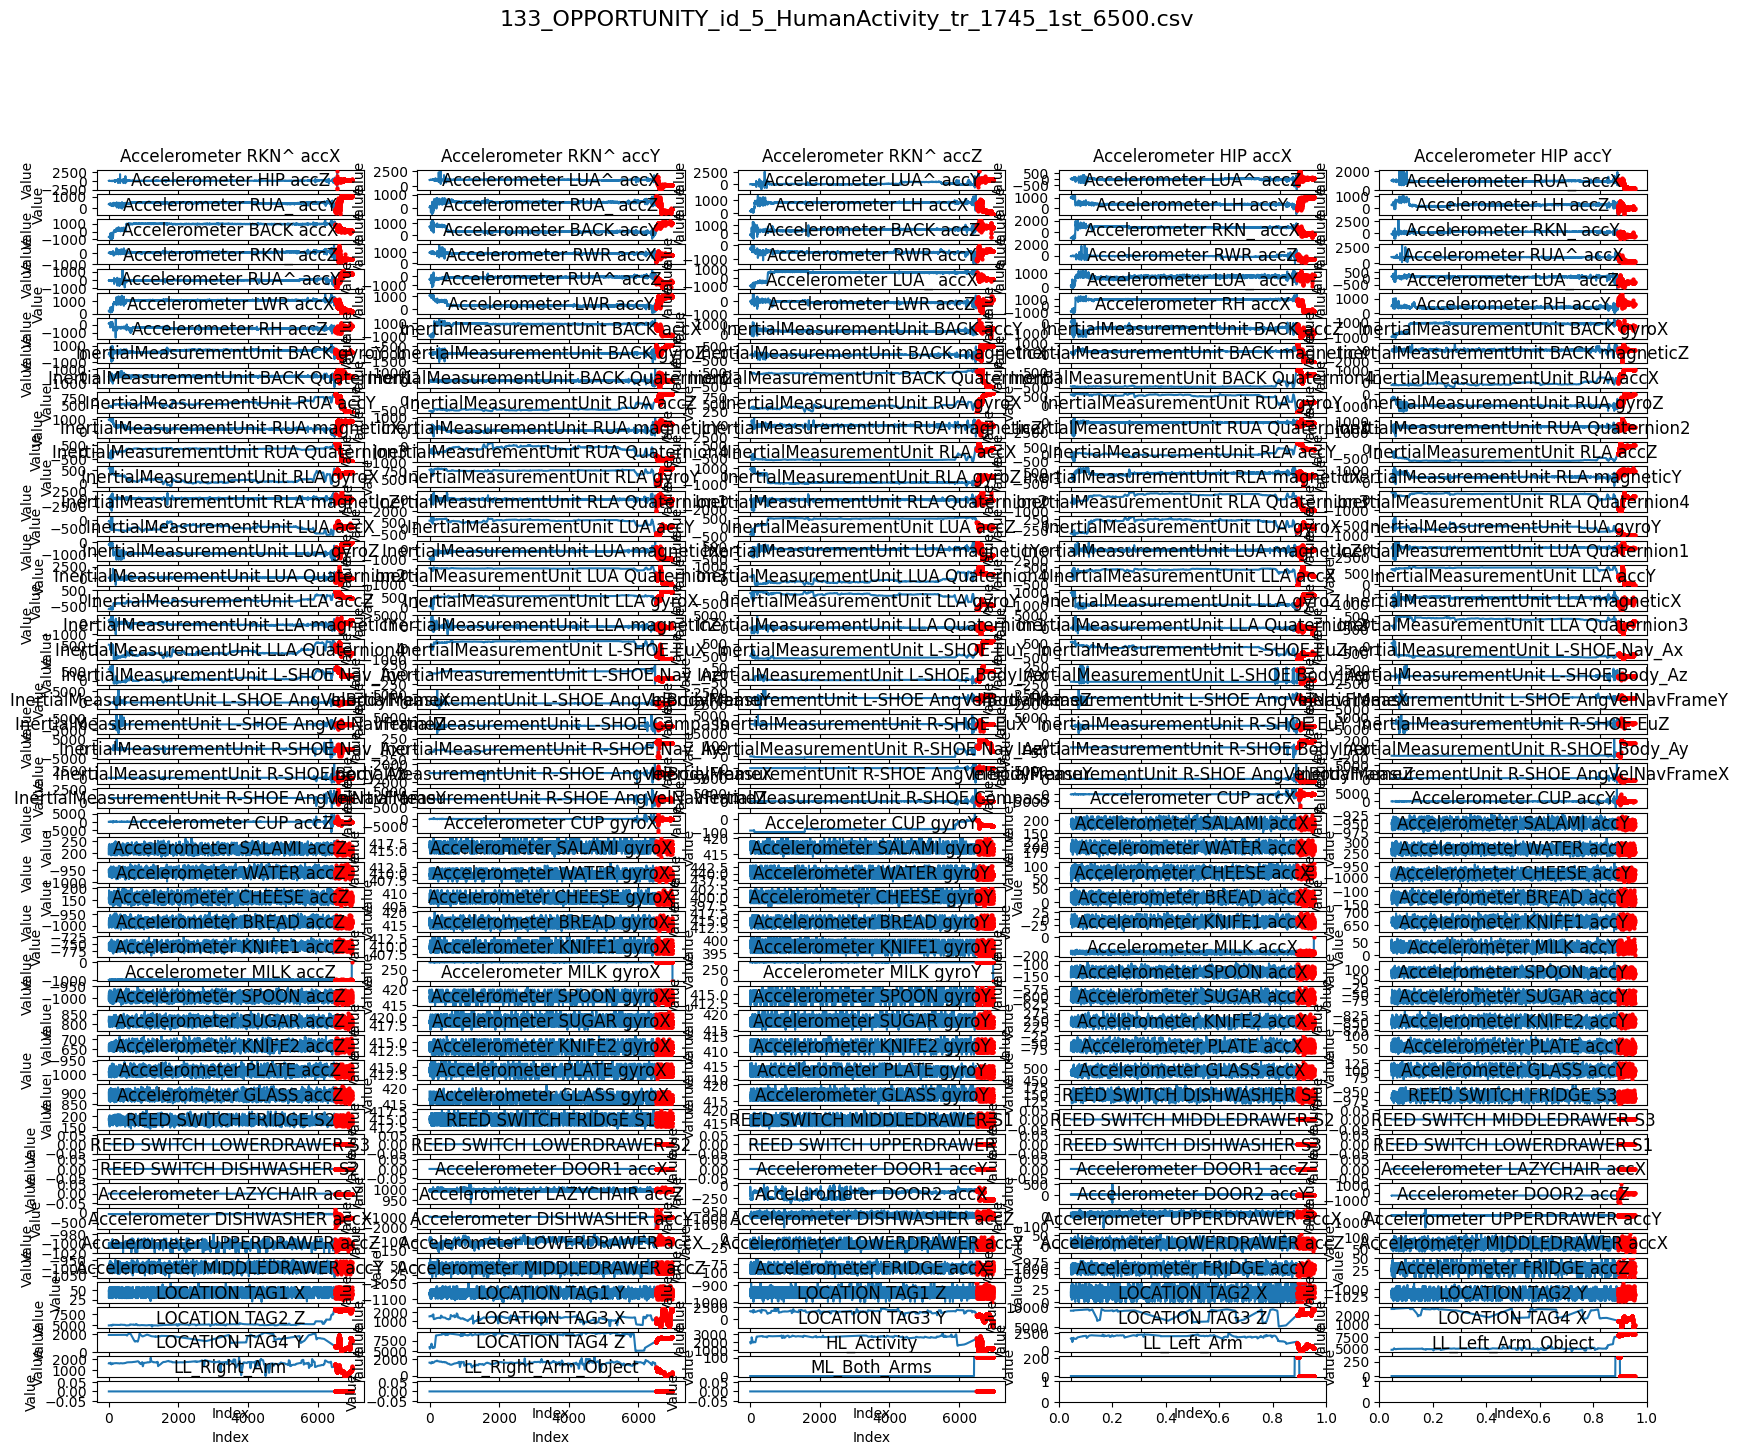

(8514, 26)


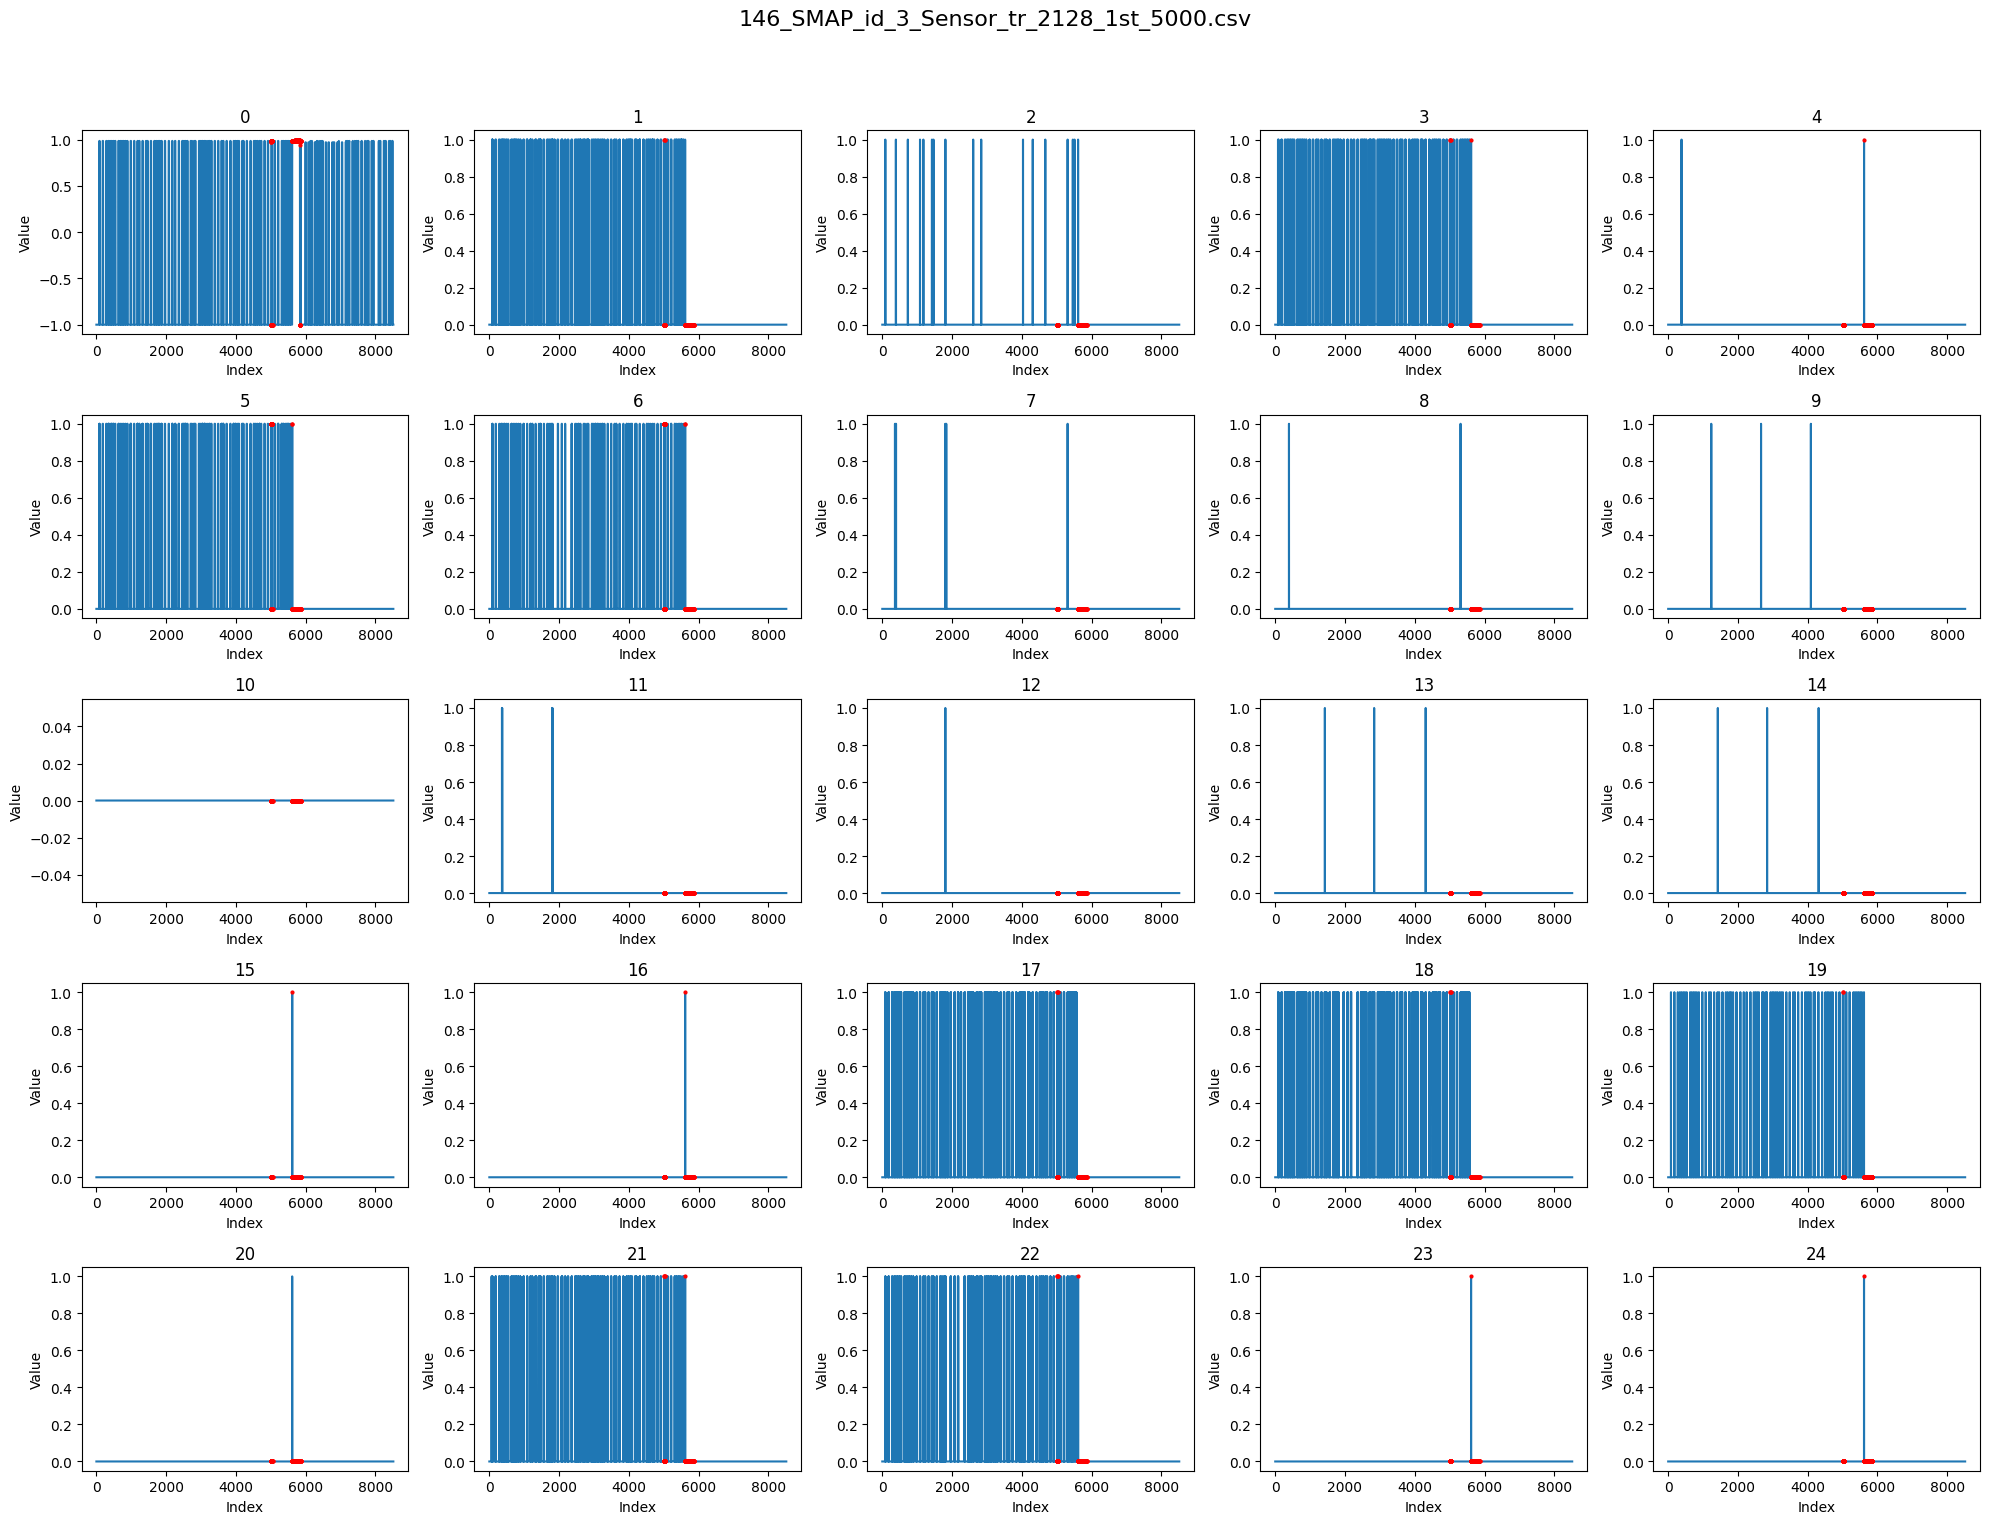

(8505, 26)


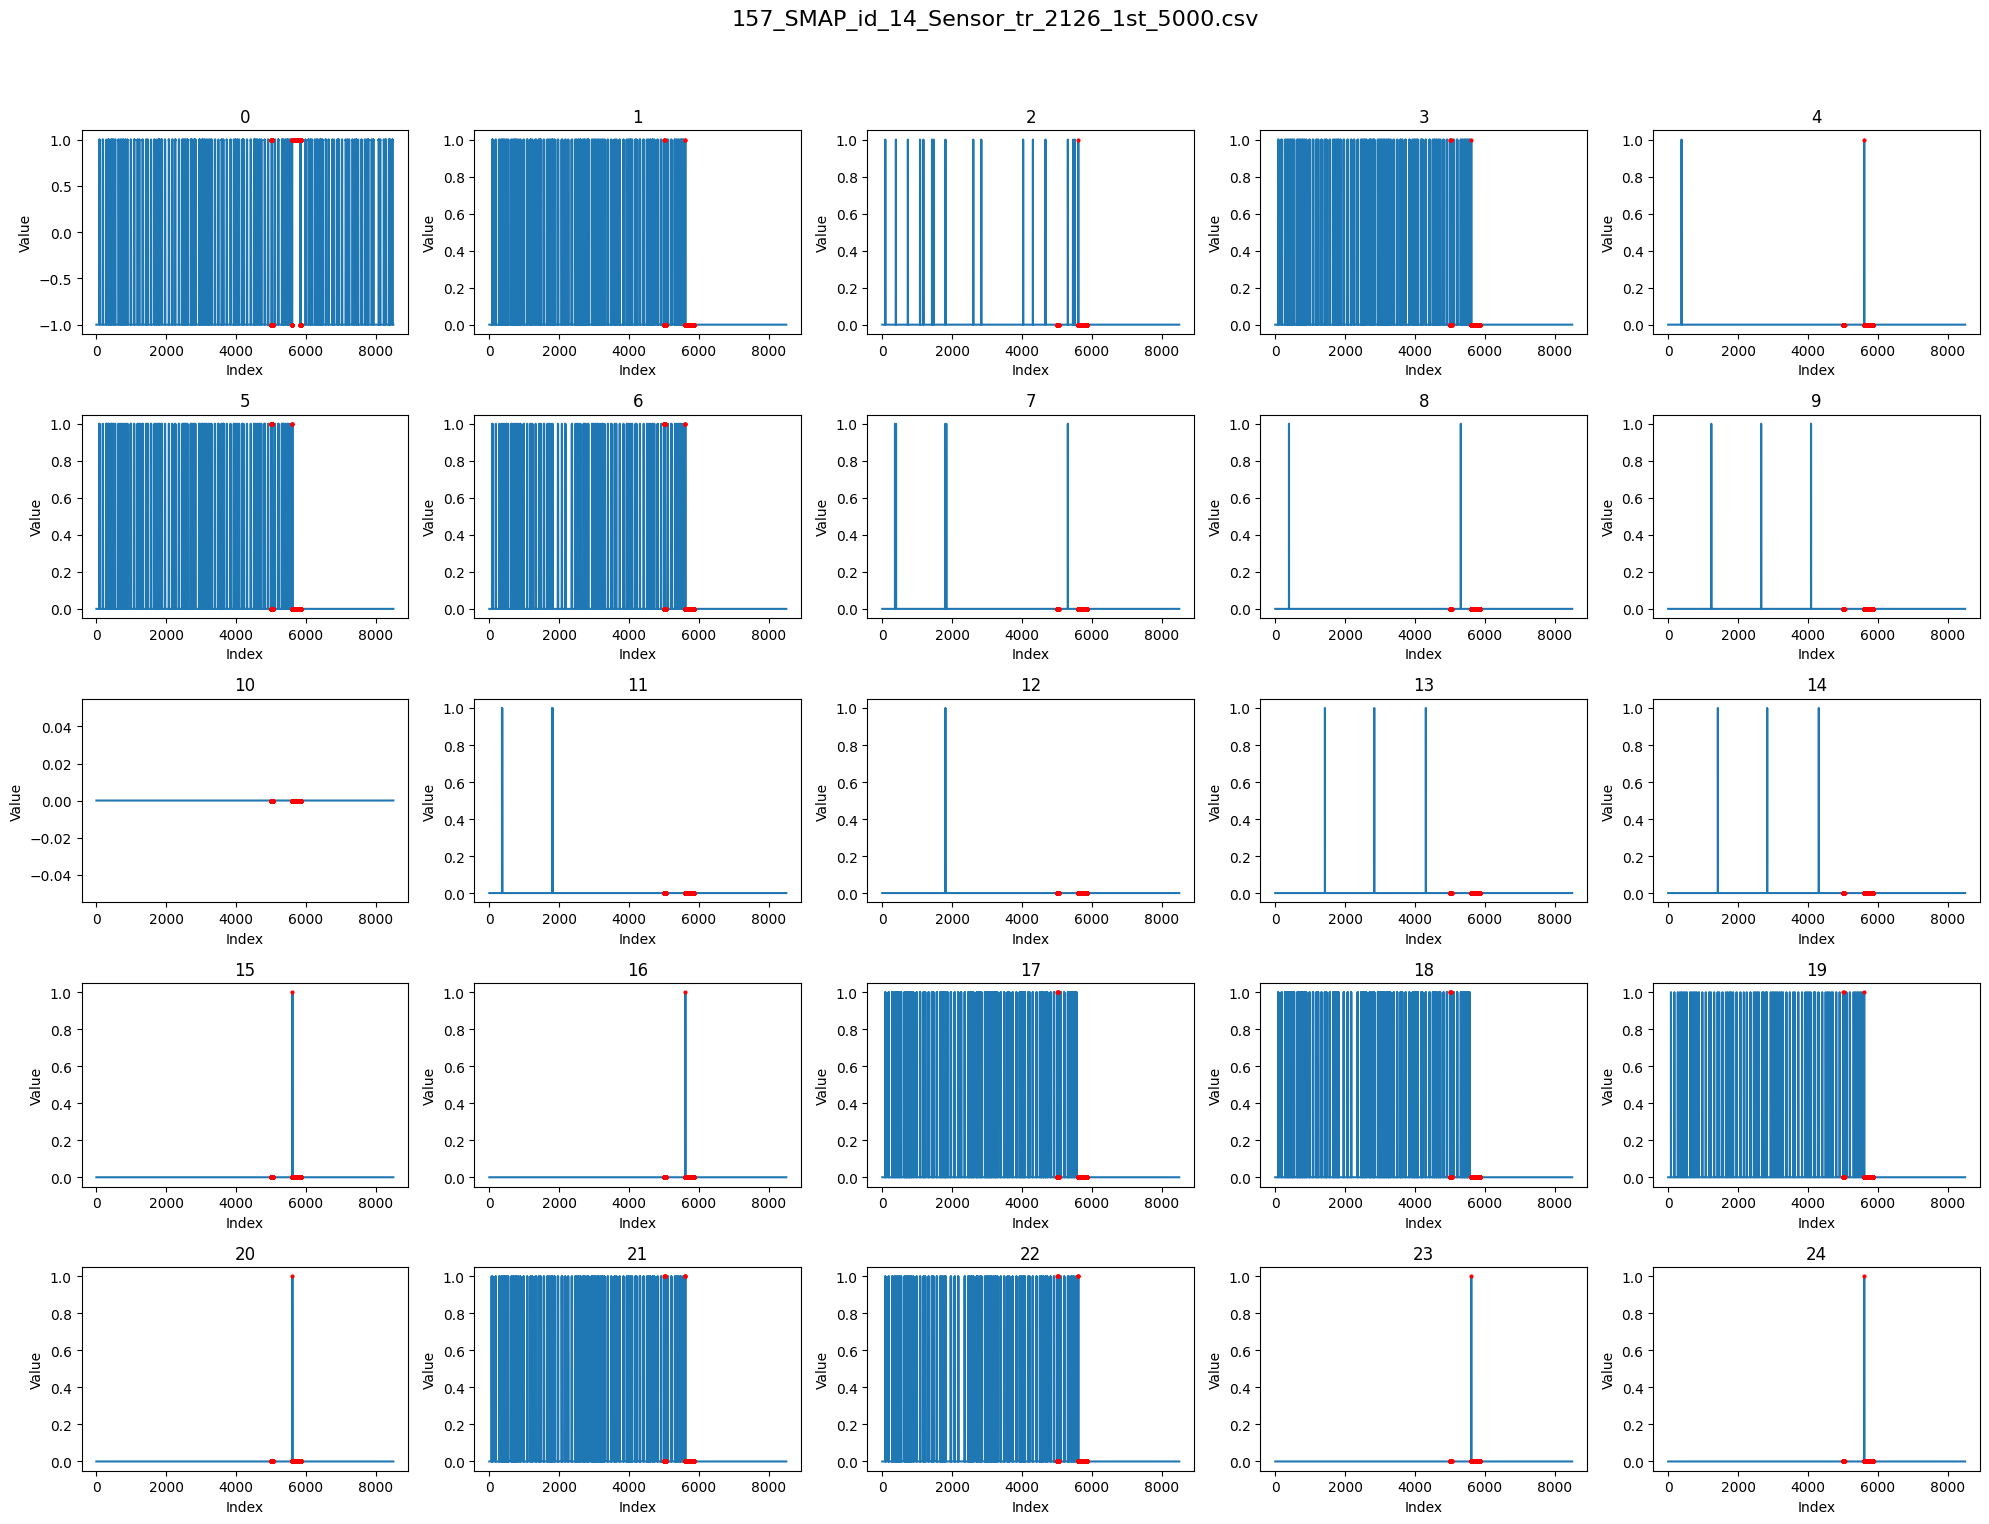

In [28]:
for file_name, df, anomaly_index in zip(file_names, dfs, anomaly_indices):
    print(df.shape)
    # Drop last column
    df.drop(df.columns[-1], axis=1, inplace=True)
    
    # Set subplot size close to square conisdering the number of columns
    num_cols = df.shape[1]
    num_rows = df.shape[0]

    # Calculate the number of subplots needed
    num_subplots = num_cols
    num_cols_subplot = 5
    num_rows_subplot = (num_subplots + num_cols_subplot - 1) // num_cols_subplot  # Ceiling division

    # Subplots
    if num_cols < num_cols_subplot:
        fig, axes = plt.subplots(1, num_subplots, figsize=(20, 5))
    else:
        fig, axes = plt.subplots(num_rows_subplot, num_cols_subplot, figsize=(20, 16))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy indexing
    for i, col in enumerate(df.columns):
        if i < num_subplots:
            axes[i].plot(df.index, df[col])
            # Overlay anomaly points in red
            anomaly_pts = [idx for idx in anomaly_index if idx < len(df)]
            if anomaly_pts:
                axes[i].scatter(anomaly_pts, df[col].iloc[anomaly_pts], color='red', zorder=3, s=4)
            axes[i].set_title(col)
            axes[i].set_xlabel('Index')
            axes[i].set_ylabel('Value')
        else:
            axes[i].axis('off')  # Hide unused subplots
    fig.suptitle(f'{file_name}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
    plt.show()

